# Example to test the use of xarray/dask with netcdf tiles:

#########################

In [1]:
import xarray as xr
import numpy as np

#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:46583")
client

/home/gula/.virtualenvs/croco36/lib/python3.6/site-packages/distributed/client.py:1129: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| numpy   | 1.19.2 | 1.18.4    | 1.18.4  |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Client Scheduler: tcp://127.0.0.1:46583 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 67.55 GB


In [3]:
%%time

#######################
# open dataset

def grdfiles(i):
    return '/net/omega/local/tmp/1/gula/GIGATL1/GIGATL1_1h_tides/GRD/gigatl1_grd_masked.' + '{0:04}'.format(i) + '.nc'

def filesmap(files,np_xi,np_eta):
    indices = np.arange(np_xi*np_eta).reshape(np_eta,np_xi)[:,:]
    return [[files(indices[j,i]) for i in range(1,np_xi-1)] for j in range(1,np_eta-1)]
    
#######################


grd = xr.open_mfdataset(filesmap(grdfiles,100,100), concat_dim=['eta_rho', 'xi_rho'], combine='nested')

grd


CPU times: user 3min 5s, sys: 11.7 s, total: 3min 17s
Wall time: 5min 41s


<xarray.Dataset>
Dimensions:    (eta_rho: 13720, eta_v: 140, one: 1, xi_rho: 10290, xi_u: 105)
Dimensions without coordinates: eta_rho, eta_v, one, xi_rho, xi_u
Data variables:
    spherical  (xi_rho, eta_rho, one) |S1 dask.array<chunksize=(105, 140, 1), meta=np.ndarray>
    angle      (eta_rho, xi_rho) float64 dask.array<chunksize=(140, 105), meta=np.ndarray>
    h          (eta_rho, xi_rho) float64 dask.array<chunksize=(140, 105), meta=np.ndarray>
    hraw       (eta_rho, xi_rho) float64 dask.array<chunksize=(140, 105), meta=np.ndarray>
    f          (eta_rho, xi_rho) float64 dask.array<chunksize=(140, 105), meta=np.ndarray>
    pm         (eta_rho, xi_rho) float64 dask.array<chunksize=(140, 105), meta=np.ndarray>
    pn         (eta_rho, xi_rho) float64 dask.array<chunksize=(140, 105), meta=np.ndarray>
    lon_rho    (eta_rho, xi_rho) float64 dask.array<chunksize=(140, 105), meta=np.ndarray>
    lat_rho    (eta_rho, xi_rho) float64 dask.array<chunksize=(140, 105), meta=np.ndarray>
    mask_rho   (eta_rho, xi_rho) float64 dask.array<chunksize=(140, 105), meta=np.ndarray>
    lon_psi    (xi_rho, eta_rho, eta_v, xi_u) float64 dask.array<chunksize=(105, 140, 140, 105), meta=np.ndarray>
    lat_psi    (xi_rho, eta_rho, eta_v, xi_u) float64 dask.array<chunksize=(105, 140, 140, 105), meta=np.ndarray>
    xl         (xi_rho, eta_rho, one) float64 dask.array<chunksize=(105, 140, 1), meta=np.ndarray>
    el         (xi_rho, eta_rho, one) float64 dask.array<chunksize=(105, 140, 1), meta=np.ndarray>
    lon_u      (xi_rho, eta_rho, xi_u) float64 dask.array<chunksize=(105, 140, 105), meta=np.ndarray>
    lat_u      (xi_rho, eta_rho, xi_u) float64 dask.array<chunksize=(105, 140, 105), meta=np.ndarray>
    lon_v      (eta_rho, eta_v, xi_rho) float64 dask.array<chunksize=(140, 140, 105), meta=np.ndarray>
    lat_v      (eta_rho, eta_v, xi_rho) float64 dask.array<chunksize=(140, 140, 105), meta=np.ndarray>
Attributes:
    partition_ucla:  [    0 10000     1     1]
    title:           ROMS grid by Easy Grid (v 2017). Settings: nx: 10500 ny:...
    date:            20-Oct-2018
    type:            ROMS grid produced by Easy Grid
    VertCoordType:   NEW
    _NCProperties:   version=2,netcdf=4.6.3,hdf5=1.10.4

Task exception was never retrieved
future: <Task finished coro=<connect.<locals>._() done, defined at /home/gula/.virtualenvs/croco36/lib/python3.6/site-packages/distributed/comm/core.py:288> exception=CommClosedError()>
Traceback (most recent call last):
  File "/home/gula/.virtualenvs/croco36/lib/python3.6/site-packages/distributed/comm/core.py", line 298, in _
    write = await asyncio.wait_for(comm.write(local_info), 1)
  File "/usr/lib/python3.6/asyncio/tasks.py", line 351, in wait_for
    yield from waiter
concurrent.futures._base.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/gula/.virtualenvs/croco36/lib/python3.6/site-packages/distributed/comm/core.py", line 304, in _
    raise CommClosedError() from e
distributed.comm.core.CommClosedError


CPU times: user 21.3 s, sys: 4.92 s, total: 26.2 s
Wall time: 53.6 s


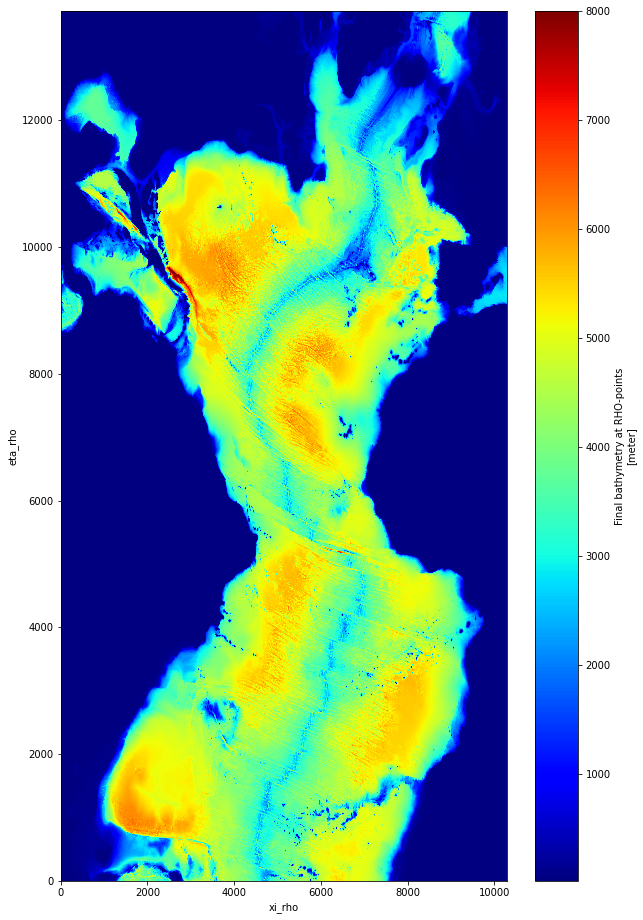

In [4]:
%%time

fig = plt.figure(figsize=(12,14))

grd.h.plot(cmap='jet')

#####

In [ ]:
%%time


def hisfiles(i):
    return  '/net/omega/local/tmp/1/gula/GIGATL1/GIGATL1_1h/SURF/gigatl1_surf.2008-05-20/gigatl1_surf.' + '{0:04}'.format(i) + '.nc'


his_rho = xr.open_mfdataset(filesmap(hisfiles,100,100), concat_dim=['eta_rho', 'xi_rho'], combine='nested')
#his_u = xr.open_mfdataset(hismap, concat_dim=['eta_rho', 'xi_u'], combine='nested')
#his_v = xr.open_mfdataset(hismap, concat_dim=['eta_v', 'xi_rho'], combine='nested')

#######################

his_rho.temp


In [ ]:
%%time

fig = plt.figure(figsize=(12,14))

his_rho.temp.isel(time=110).plot(cmap='jet')

#####